准确率: 0.8877
读入的数字图片：


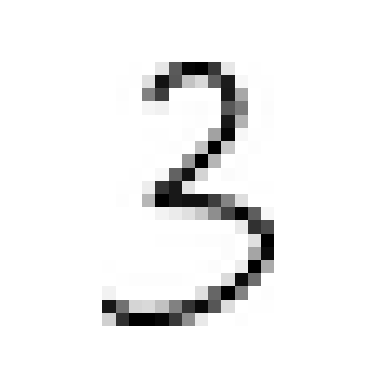

识别结果： 3


In [ ]:
import os
import struct
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

#装入训练图像及标签到变量x_train, y_train
kind='train'
path=r'.\data\mnist'
labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)#训练标签路径
images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)#训练图像路径

with open(labels_path, 'rb') as lbpath:#打开训练标签文件并读取数据
    magic,n  = struct.unpack('>2I',lbpath.read(8))
    labels = np.fromfile(lbpath, dtype=np.uint8)

with open(images_path, 'rb') as imgpath:#打开训练图像文件并读取数据
    magic, num, rows, cols = struct.unpack(">4I",imgpath.read(16))
    images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)/255

x_train, y_train =images,labels

#装入测试图像及标签到变量x_test, y_test
kind='t10k'
path=r'.\data\mnist'
labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)#测试标签路径
images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)#训练图像路径

with open(labels_path, 'rb') as lbpath:#打开测试标签文件并读取数据
    magic,n  = struct.unpack('>2I',lbpath.read(8))
    labels = np.fromfile(lbpath, dtype=np.uint8)

with open(images_path, 'rb') as imgpath:#打开测试图像文件并读取数据
    magic, num, rows, cols = struct.unpack(">4I",imgpath.read(16))
    images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)/255

x_test, y_test =images,labels
'''
#查看样本数据 抽取10张手写的数字图片
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
#0到9的数字中每个取一个
for i in range(10):
    #img = x_train[np.argmax(y_train,axis=1)==i][0].reshape(28, 28)
    
    img = x_train[y_train==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
   
#不显示坐标轴
plt.xticks([])
plt.yticks([])
''' 
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

def dsigmoid(x):
    ds=x*(1-x)
    return ds

def initialize_with_zeros(n_x,n_h,n_y,std=0.001):
    np.random.seed(2)
    W1=np.random.randn(n_h,n_x)*std    # W1=np.random.randn(n_h,n_x)
    #W1=np.random.uniform(-np.sqrt(6)/np.sqrt(n_x+n_h),np.sqrt(6)/np.sqrt(n_h+n_x),size=(n_h,n_x))    
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*std  # W2=np.random.randn(n_y,n_h)
    #W2=np.random.uniform(-np.sqrt(6)/np.sqrt(n_y+n_h),np.sqrt(6)/np.sqrt(n_y+n_h),size=(n_y,n_h))
    b2=np.zeros((n_y,1))
 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
 
    return parameters

def forward(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    # print W1,X,b1
    Z1=np.dot(W1,X)+b1
    A1=sigmoid(Z1)
    #A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    dict = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, dict

def loss(A2,Y,parameters):
    #定义一个小常数，防止log中的值为0
    #t=1e-6
    #logprobs=np.multiply(np.log(A2+t),Y) + np.multiply(np.log(1-A2+t),(1-Y))
    #loss1=np.sum(logprobs,axis=0,keepdims=True)/A2.shape[0]
    
    loss=Y-A2
    loss1=np.sum(loss)
    
    return loss1*(-1)

def backward(parameters,dict,X,Y):
    # 获取参数
    W1=parameters["W1"]
    W2=parameters["W2"]
    A1 = dict["A1"]
    A2 = dict["A2"]
    Z1=dict["Z1"]
    #误差的反向传播
    dZ2=A2-Y
 
    delta2=dZ2#*dsigmoid(A2)
    dW2=np.dot(delta2,A1.T)
    db2=np.sum(delta2,axis=1,keepdims=True)
    #dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dZ1=np.dot(W2.T,dZ2)*dsigmoid(A1)
    delta1=dZ1#*dsigmoid(A1)
    dW1=np.dot(delta1,X.T)
    db1=np.sum(delta1,axis=1,keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2} 

    return grads

def gradient(parameters, grads, learning_rate ):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    #更新参数梯度
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
     
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


def png_to_mnist_array(img_path):
    """
    将任意 PNG/JPG 手写数字图像转换为与 MNIST 一致的 28x28 灰度归一化数组（float32，范围0-1）。
    兼容不同 Pillow 版本（Pillow>=10 去掉了 Image.ANTIALIAS）。
    """
    from PIL import Image, ImageOps
    import numpy as np

    # 兼容不同 Pillow 版本的重采样滤波器
    try:
        resample = Image.Resampling.LANCZOS
    except AttributeError:
        # Pillow < 10 仍有 Image.LANCZOS / Image.ANTIALIAS
        resample = getattr(Image, 'LANCZOS', getattr(Image, 'ANTIALIAS', 1))

    img = Image.open(img_path).convert('L')  # 灰度
    arr = np.array(img)

    # 如果背景为白（均值偏大），反色使笔画变亮（接近255）
    if arr.mean() > 127:
        arr = 255 - arr

    # 二值化用于求边界（采用较低阈值保留灰度笔画）
    bw = arr > 30
    coords = np.column_stack(np.where(bw))
    if coords.size == 0:
        # 若未检测到笔画，则直接缩放居中（避免崩溃）
        img28 = Image.fromarray(arr).resize((28, 28), resample=resample)
        out = np.array(img28, dtype=np.float32) / 255.0
        return out

    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0)

    crop = arr[y0:y1+1, x0:x1+1]
    crop_img = Image.fromarray(crop)

    # 等比例缩放到最大边长为20（与经典 MNIST preprocessing 类似）
    max_dim = 20
    w, h = crop_img.size
    scale = max_dim / max(w, h)
    new_w = int(round(w * scale))
    new_h = int(round(h * scale))
    if new_w < 1: new_w = 1
    if new_h < 1: new_h = 1

    resized = crop_img.resize((new_w, new_h), resample=resample)

    # 创建 28x28 黑背景图，将 resized 居中粘贴
    canvas = Image.new('L', (28, 28), 0)
    left = (28 - new_w) // 2
    top = (28 - new_h) // 2
    canvas.paste(resized, (left, top))

    out = np.array(canvas, dtype=np.float32) / 255.0
    return out

if __name__ == '__main__':
    train_images = x_train
    train_labels = y_train
    test_images = x_test
    test_labels = y_test
    #print(train_images.shape)
 
    count=0
    n_x=28*28
    n_h=100
    n_y=10
    lr=0.01
    loss_all=[]
    train_size=100
    parameters=initialize_with_zeros(n_x,n_h,n_y)
    for i in range(20000):
        #每次取一个样本
        img_train=train_images[i]
        label_train1=train_labels[i]
        label_train=np.zeros((10,1))
        #批量运行
        #batch_mask = np.random.choice(train_size, batch_size)
        #x_batch = x_train[batch_mask]
        #t_batch = y_train[batch_mask]
        
        #动态修改学习率
        if i%2000==0:
            lr=lr*0.99
        #转换为onehot编码
        label_train[int(train_labels[i])]=1
        # 转换为二维向量
        imgvector=np.expand_dims(img_train,axis=1)
        
        A2,dict=forward(imgvector,parameters)
        #pre_label=np.argmax(A2)
        #统计损失值
        
        loss1=loss(A2,label_train,parameters)
        grads = backward(parameters, dict, imgvector, label_train)
        parameters = gradient(parameters, grads, learning_rate = lr)
        grads["dW1"]=0
        grads["dW2"]=0
        grads["db1"]=0
        grads["db2"]=0
        #每隔循环200次打印一次
        #if i%200==0:
            #print("迭代：{} 次的损失值:{:.6f}".format(i,loss1[0][0]))
            #loss_all.append(loss1[0][0])
            
            
    # 训练模型
    for i in range(10000):
        img_test=test_images[i]
        #vector_image=narmalize_data(image2vector(img_train))
        vector_image=np.expand_dims(img_test,axis=1)
        label_trainx=test_labels[i]
        aa2,xxx=forward(vector_image,parameters)
        predict_value=np.argmax(aa2)
        #print(predict_value)
        if predict_value==int(label_trainx):
            count+=1

    print("准确率:",count/10000)

    print("读入的数字图片：")
png_path = r".\digit\num3.png"   # 此处为 png 文件路径
if os.path.exists(png_path):
    img = png_to_mnist_array(png_path)
else:
    # 回退到原来的 .npy 文件（如果没有 png）
    img = np.load(r".\digit\num3.npy")

plt.imshow(img, cmap='Greys', interpolation='nearest')
plt.axis("off")
plt.show()

graph = np.array(img)
graph = graph.flatten()
vector_graph = np.expand_dims(graph, axis=1)
aa2, xxx = forward(vector_graph, parameters)
predict_result = np.argmax(aa2)
print("识别结果：", predict_result)